<a href="https://colab.research.google.com/github/LucilleKaleha/IP_Week_9/blob/master/Week9_IP_Implementing_kNN_NaiveBayes_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question


This week's project requires us to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier

## Data

The datasets used for this project were sourced from the given links:

Dataset 1 Source:

  [Train Dataset Source: https://www.kaggle.com/c/titanic/download/train.csv,] 

  [Test Dataset Source: https://www.kaggle.com/c/titanic/download/test.csv]
                   
Dataset 2 Source: [https://archive.ics.uci.edu/ml/datasets/Spambase]

## Proposed Experimental Procedure

    Randomly partition each dataset into two parts i.e 80 - 20  sets.

    For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data 
    (i.e. splitting further), then perform K-nearest neighbor classification.

    For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

### Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading and Previewing First Dataset

This is the titanic dataset

In [0]:
# We'll call the titanic train dataset 'train_df' and the test dataset 'test_df'
# 
train_df = pd.read_csv('/content/train (1).csv')
test_df = pd.read_csv('/content/test (1).csv')

In [0]:
# Previewing the top of the train dataframe
# 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Previewing the top of the test dataframe
# 
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


This project requires us to create our own train and test data by partitioning the train dataframe! We are therefore not going to work with the test dataframe

### Exploratory Data Analysis

In [0]:
# Checking the column data types
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
# Getting the general descriptive statistics on our columns
# 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# Checking whwther our dataframe has any null values
# 
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# Cabin has a very high number of missing values
# Dropping these valueus probably wont have an impact on our model
# 
train_df = train_df.drop('Cabin', axis = 1)

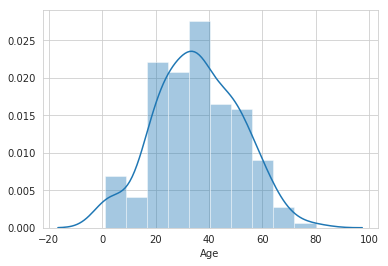

In [0]:
# Let's create a copy of our dataframe and look at the distribution of age
# This will help us decide the best way to fill the null values in the column
# 
copy = train_df.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

We can see that the distribution is skewed to the right, this means that very large values on that end will greatly impact the mean, as opposed to the median, which will only be slightly impacted. Because of this, we will fill the missing values with the median

In [0]:
# Replacing the null values in the dataframe
# 
train_df.Age = train_df.Age.fillna(train_df['Age'].median())
train_df.Embarked = train_df.Embarked.fillna("S")

Let's look at a pair plot that shows an overview of the relationship between all of the different features in our dataframe

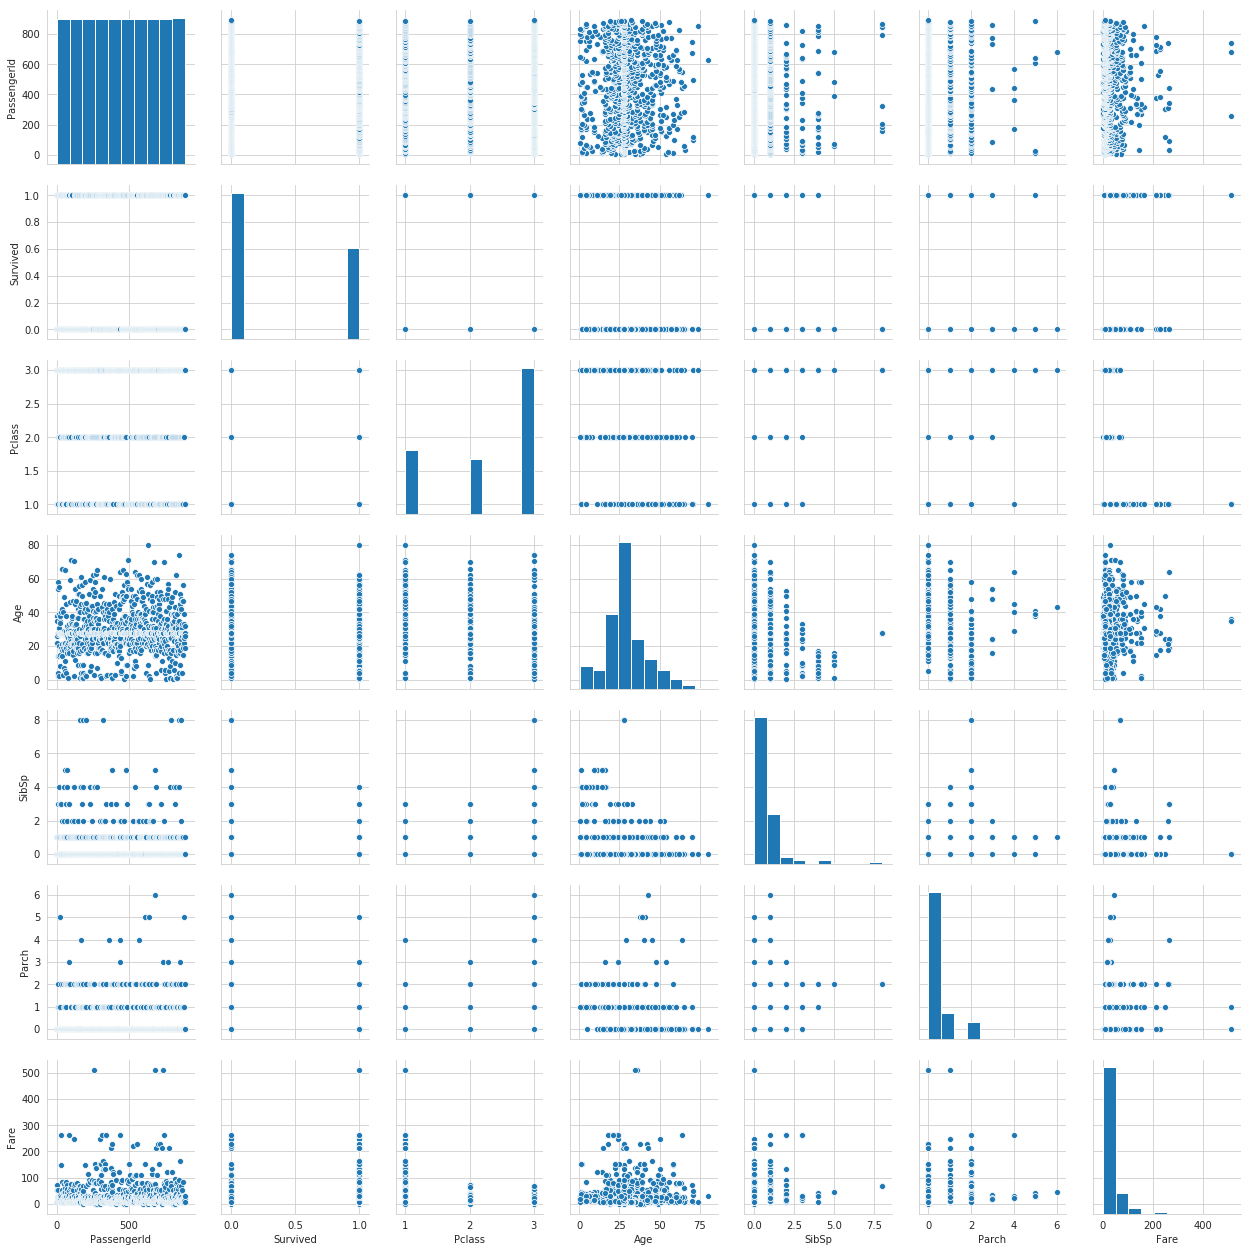

In [0]:
 sns.pairplot(train_df)

We can take a closer look at these relationships to determine which variables had a bigger impact on whether a passenger survived or not

In [0]:
# First we can tabulate some numbers on the survivors
# 
survived_females = train_df[train_df.Sex == "female"]["Survived"].sum()
survived_males = train_df[train_df.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((survived_females + survived_males)))
print('\n')
print("Percentage of Females who survived:") 
print((survived_females/(survived_females + survived_males))*100)
print('\n')
print("Percentage of Males who survived:")
print((survived_males/(survived_females + survived_males))*100)

Total people survived is: 342


Percentage of Females who survived:
68.12865497076024


Percentage of Males who survived:
31.871345029239766


We should note that the numbers above only compare the survivors i.e size of female survivors compared to the male survivors.


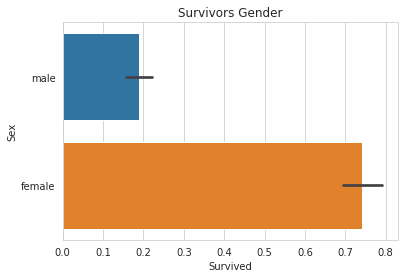

In [0]:
# We can use a graph to show the comparison between the survivors and all the 
# passengers on board
sns.barplot("Survived", "Sex", data = train_df)
plt.title("Survivors Gender")
plt.show()

From this we can deduce that there were more female survivors than there were male ones

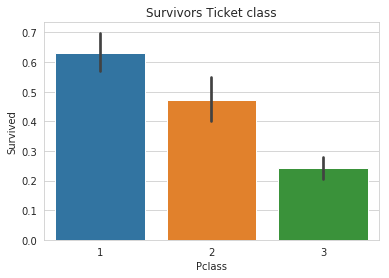

In [0]:
# Now let's compare survivors to the Ticket class
# 
sns.barplot("Pclass", "Survived",  data = train_df)
plt.title("Survivors Ticket class")
plt.show()

This shows us that most survivors were the passengers in the first ticket class

Text(0.5, 1.0, 'Survival Rates Based on Gender and Ticket Class')

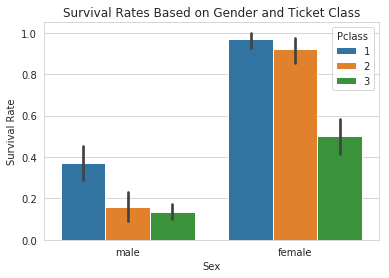

In [0]:
# We can combine the above two graphs and get a better comparison like so
# 
sns.barplot("Sex", "Survived", hue="Pclass", data = train_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Ticket Class")

### Feature Engineering

In [0]:
# Dropping the columns that will not be necessary to build our model
# 
train_df = train_df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare'])

In [0]:
# According to the dictionary we have on the data, we know that SibSp	is the nummber 
# of siblings and spouses aboard the Titanic and Parch is the number of parents and 
# children aboard the Titanic
# 
# We want to create a column that tells us whether a passenger was on-board alone or 
# with family. In order to do this, first we'll create a column of family on board by combining the SibSp 
# and Parch columns
# 
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [0]:
# From this family column we can then create another column, we'll call it 'Solo',
# that will tell us whether a passenger was alone or not 

train_df["Solo"] = train_df.Family.apply(lambda x: 1 if x >= 1 else 0)     #This will return 1 if the passenger was not alone and 0 if they were

In [0]:
# Now, we can also drop the family, sibsp and parch columns

train_df = train_df.drop(columns= ['SibSp', 'Parch', 'Family'])


In [0]:
# Finally, we get dummies for the categorical columns, sex anf embarked
# 
train_df = pd.get_dummies(train_df)
train_df.head()

,Survived,Pclass,Age,Solo,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,1,0,1,0,0
2,1,3,26.0,0,1,0,0,0,1
3,1,1,35.0,1,1,0,0,0,1
4,0,3,35.0,0,0,1,0,0,1


## kNN Classifier

In [0]:
# Importing the libraries we'll require for building our model
# 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
# Separating the target vaiable from the dataframe
# 
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

### 80-20 Split

In [0]:
# Dividing the dataframe into train and test sets
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [0]:
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated(This is called feature scaling)

scaler = StandardScaler()
scaler.fit(X_train)
# 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Training and Predictions
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# 
y_pred = classifier.predict(X_test)
# 
# Evaluating the Algorithm
#
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8379888268156425
[[101   9]
 [ 20  49]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



When it comes to evaluation of a model’s performance, sometimes accuracy may not be the best indicator.
Some problems that we are solving might have very imbalanced class and using accuracy might not give us enough confidence to understand the algorithm’s performance. 
This is where the Confusion Matrix comes in handy. It is a very good way to understand results like true positive, false positive, true negative and false negative

We will repeat the above process for the 70-30 split and 60-40 split

### 70-30 Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# 
y_pred = classifier.predict(X_test)
#
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7910447761194029
[[142  26]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.73      0.70      0.71       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



### 60-40 Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# 
y_pred = classifier.predict(X_test)
#
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7703081232492998
[[183  38]
 [ 44  92]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       221
           1       0.71      0.68      0.69       136

    accuracy                           0.77       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.77      0.77      0.77       357



### kNN Hyper Parameter Tuning

In [0]:
# For hpt, we're going to play around with the number of n_neighbors in the classifiers
# to see if we can improve the predicting accuracy
# First, we'll create a list of n_neighbors from 1 to 17
# 
neighbors = list(np.arange(1,18))

# We then create an empty list where the respective model score is stored
# 
model_score = pd.Series()

# splitting the dataset into train and test splits
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# iterating the kNN classifier model each time with each of the(1 to 30) n_neighbors and 
# appending the score in the above list

for i in neighbors:
    model = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    model_score = model_score.append(pd.Series(accuracy))
# 
# We can then create a dataframe with the above information
# 
neighbor_perfomance = pd.DataFrame({'no_neighbors' : neighbors, 'accuracy_score': model_score})
neighbor_perfomance

,no_neighbors,accuracy_score
0,1,0.759777
0,2,0.798883
0,3,0.793296
0,4,0.793296
0,5,0.782123
0,6,0.804469
0,7,0.815642
0,8,0.821229
0,9,0.810056
0,10,0.782123


The number of n_neighbors with the highest score is 8, but in order to avoid bias when choosing the number of neighbors, it is advisable to choose an odd number o neighbors. The next best for our model is 7 n_neighbors.

Let's repeat this for the other two splits and see what are the optimum number of n_neighbors for an acceptable accuracy score.

In [27]:
# for the 70-30 split
# 
neighbors = list(np.arange(1,18))
#  
model_score = pd.Series()
#  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 
for i in neighbors:
    model = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    model_score = model_score.append(pd.Series(accuracy))
#  
neighbor_perfomance = pd.DataFrame({'no_neighbors' : neighbors, 'accuracy_score': model_score})
neighbor_perfomance

,no_neighbors,accuracy_score
0,1,0.772388
0,2,0.776119
0,3,0.768657
0,4,0.764925
0,5,0.764925
0,6,0.764925
0,7,0.772388
0,8,0.779851
0,9,0.783582
0,10,0.764925


For this split, the best number of neighbors appears to be 15 with an accuracy of 79% 

In [28]:
# for the 60-40 split
# 
neighbors = list(np.arange(1,18))
#  
model_score = pd.Series()
#  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
# 
for i in neighbors:
    model = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    model_score = model_score.append(pd.Series(accuracy))
#  
neighbor_perfomance = pd.DataFrame({'no_neighbors' : neighbors, 'accuracy_score': model_score})
neighbor_perfomance

,no_neighbors,accuracy_score
0,1,0.736695
0,2,0.733894
0,3,0.756303
0,4,0.747899
0,5,0.739496
0,6,0.750700
0,7,0.739496
0,8,0.747899
0,9,0.756303
0,10,0.739496


For this split, 3 and 9 number of neighbors yield the same kind of accuracy of 75.63%

### Loading and Previewing Second Dataset

This dataset is from UCI machine learning repository, and we're going to use it to classiy whether an email is spam or not


In [34]:
# Let's call our dataframe 'spam'
# 
spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
spam.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The last column of the spam dataset describes whether the e-mail was considered spam (1) or not (0)

In [0]:
# Checking the shape of the dataframe
spam.shape

(4601, 58)

In [0]:
# Grtting some general descriptive analysis on our dataframe
# 
spam.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

In [0]:
# Checking the datatypes
# 
spam.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object

Our data looks like it has already been pre-processed, we're therefore going to move directly into building our model

## Naive Bayes Classifier

In [0]:
# importing the library we'll use for naive bayes
# 
from sklearn.naive_bayes import MultinomialNB

In [0]:
# Separating our target variable from the other features in the dataframe
# 
X = spam.iloc[:, :57].values
y = spam.iloc[:, 57].values

### The 80-20 Split

In [35]:
X = spam.iloc[:, :57].values
y = spam.iloc[:, 57].values
# Dividing the dataframe into train and test sets
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
#
# Feature scaling
X = StandardScaler().fit_transform(X)
# 
# Training and Predictions
model = MultinomialNB().fit(X_train, y_train)
# 
predicted = model.predict(X_test)
# 
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test, predicted))

0.8121606948968513
[[454  84]
 [ 89 294]]


We will repeat the above process for the 70-30 split and 60-40 split

### The 70-30 Split

In [36]:
X = spam.iloc[:, :57].values
y = spam.iloc[:, 57].values
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
#

X = StandardScaler().fit_transform(X)
# 

model = MultinomialNB().fit(X_train, y_train)
# 
predicted = model.predict(X_test)
# 
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test, predicted))

0.8095582910934106
[[699 123]
 [140 419]]


### The 60-40 Split

In [37]:
X = spam.iloc[:, :57].values
y = spam.iloc[:, 57].values
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)
# 

X = StandardScaler().fit_transform(X)
# 

model = MultinomialNB().fit(X_train, y_train)
# 
predicted = model.predict(X_test)
# 
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test, predicted))

0.8098859315589354
[[952 145]
 [205 539]]


## Conclusion

We can notice that for both our models, the smaller the test size from the dataframe the better the accuracy predictions of our models. Regardless, the Multinomial Naive Bayes Classifier still performs fairly well despite the test size(a difference of approximately .003).

Playing around with the kNN model however didn't seem to yield any better accuracy scores than the first model(approx 83%)

